In [1]:
import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt

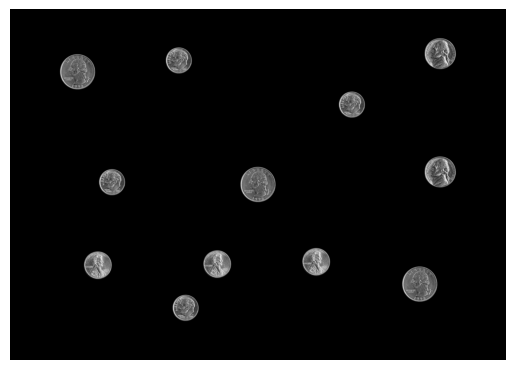

In [20]:
coins = cv.imread('Images/coins/coins.png',cv.IMREAD_GRAYSCALE)

fig1 = plt.figure()
plt.axis('off')
plt.imshow(coins,cmap='gray')

plt.show()



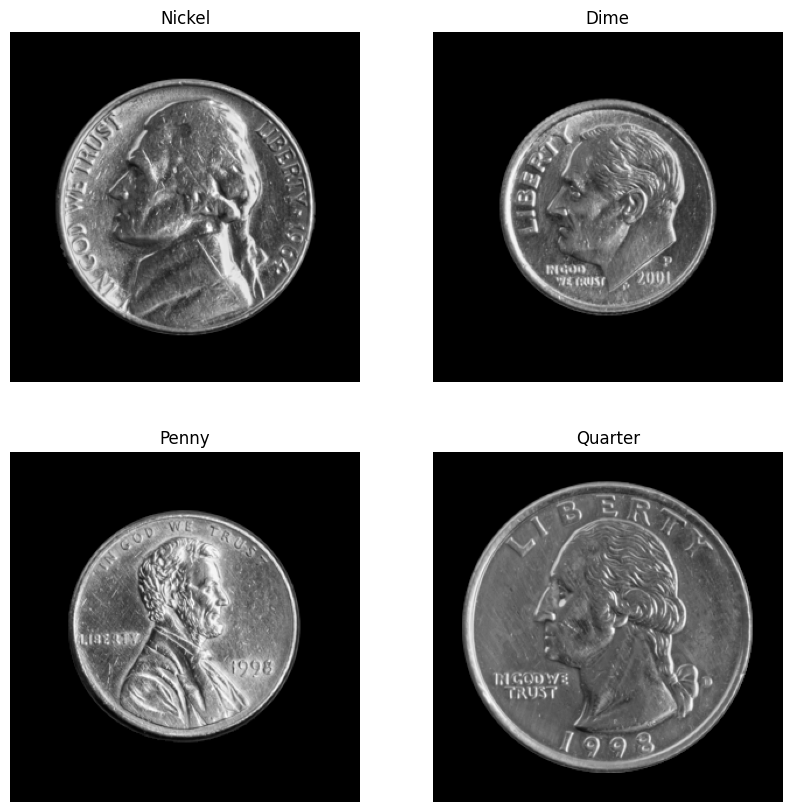

In [21]:
nickel = cv.imread('Images/coins/Nickel.png',cv.IMREAD_GRAYSCALE)
dime = cv.imread('Images/coins/Dime.png',cv.IMREAD_GRAYSCALE)
penny = cv.imread('Images/coins/Penny.png',cv.IMREAD_GRAYSCALE)
quarter = cv.imread('Images/coins/Quarter.png',cv.IMREAD_GRAYSCALE)

fig , ax = plt.subplots(2,2,figsize=(10,10))
ax[0,0].imshow(nickel,cmap='gray')
ax[0,0].set_title('Nickel')
ax[0,1].imshow(dime,cmap='gray')
ax[0,1].set_title('Dime')
ax[1,0].imshow(penny,cmap='gray')
ax[1,0].set_title('Penny')
ax[1,1].imshow(quarter,cmap='gray')
ax[1,1].set_title('Quarter')

for a in ax:
    a[0].axis('off')
    a[1].axis('off')

plt.show()

-0.31852072 1.0


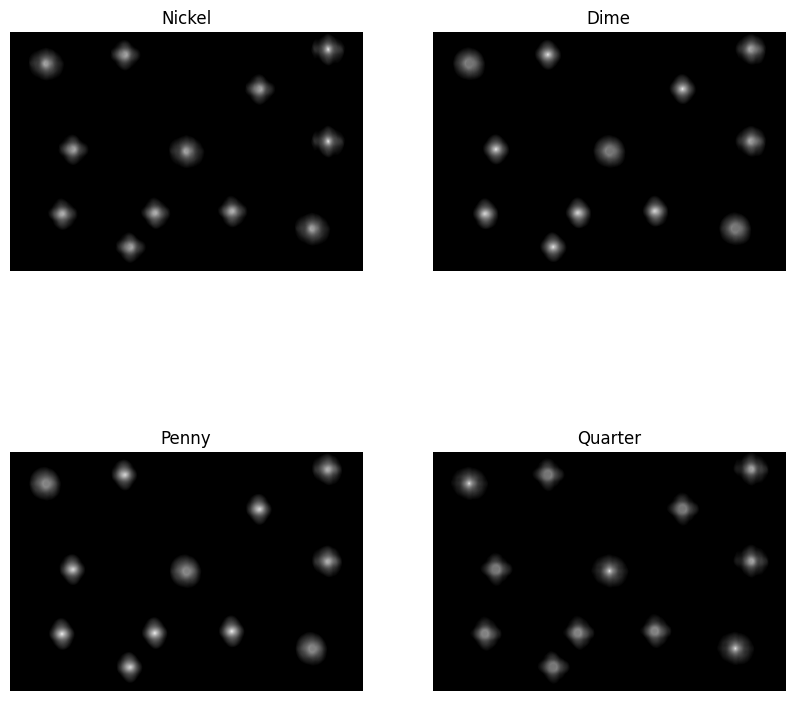

In [25]:
nickel_resp = cv.matchTemplate(coins,nickel,cv.TM_CCOEFF_NORMED)
penny_resp = cv.matchTemplate(coins,penny,cv.TM_CCOEFF_NORMED)
dime_resp = cv.matchTemplate(coins,dime,cv.TM_CCOEFF_NORMED)
quarter_resp = cv.matchTemplate(coins,quarter,cv.TM_CCOEFF_NORMED)

print(nickel_resp.min(),nickel_resp.max())

fig , ax = plt.subplots(2,2,figsize=(10,10))
ax[0,0].imshow(nickel_resp,cmap='gray',vmin=0,vmax=1)
ax[0,0].set_title('Nickel')
ax[0,1].imshow(dime_resp,cmap='gray',vmin=0,vmax=1)
ax[0,1].set_title('Dime')
ax[1,0].imshow(penny_resp,cmap='gray',vmin=0,vmax=1)
ax[1,0].set_title('Penny')
ax[1,1].imshow(quarter_resp,cmap='gray',vmin=0,vmax=1)
ax[1,1].set_title('Quarter')

for a in ax:
    a[0].axis('off')
    a[1].axis('off')

plt.show()


In [74]:
from skimage.feature import peak_local_max

#verticaly stack the responses along a new axis
results = np.stack([penny_resp,nickel_resp,dime_resp,quarter_resp],axis=2)

results[results<0] = 0

pastel_colors = [
    (255,182,193), #pink
    (173,216,230), #blue
    (119,221,119), #green
    (253,253,150)  #yellow
]

#make a color image to draw on
coins_new = cv.cvtColor(coins,cv.COLOR_GRAY2BGR)

#find local maxima
coordinates = peak_local_max(results,exclude_border=0,min_distance=300)
coordinates

array([[ 166, 2892,    1],
       [1002, 2892,    1],
       [1074,  572,    2],
       [1638, 2016,    0],
       [1962, 1092,    2],
       [1654, 1316,    0],
       [1662,  472,    0],
       [ 214, 1044,    2],
       [ 294,  328,    3],
       [ 526, 2268,    2],
       [1090, 1604,    3],
       [1794, 2748,    3]], dtype=int64)

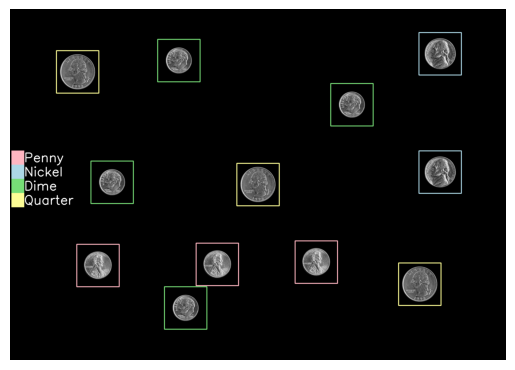

In [75]:
w = quarter.shape[0]
h = quarter.shape[1]

names = ['Penny','Nickel','Dime','Quarter']

#plot on each color
for i,coord in enumerate(coordinates):
    c = coord[2]
    cv.rectangle(coins_new,(coord[1],coord[0]),(coord[1]+w,coord[0]+h),pastel_colors[c],5)

#print a legend
for i,(name,color) in enumerate(zip(names,pastel_colors)):
    cv.rectangle(coins_new,(10,1000+100*i),(100,1100+100*i),color,-1)
    cv.putText(coins_new,name,(100,1080+100*i),cv.FONT_HERSHEY_SIMPLEX,3,(255,255,255),5,cv.LINE_AA)

plt.imshow(coins_new)
plt.axis('off')
plt.show()